# Motion Tracking with Mean Shift and CAMSHIFT

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [30]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

# get an image
IMG_PATH = get_random_img_path(skip=["flickr", "weather", "gem"])
IMG_PATH   

'../../res/img/Lions/89b1f0cdfe608678.jpg'

---
### Mean Shift Object Tracking

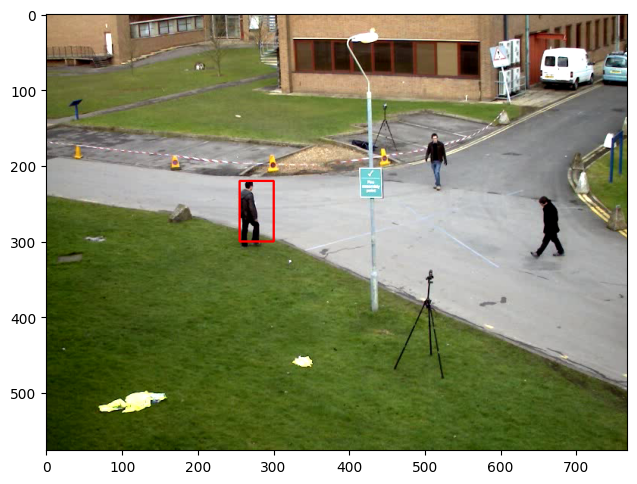

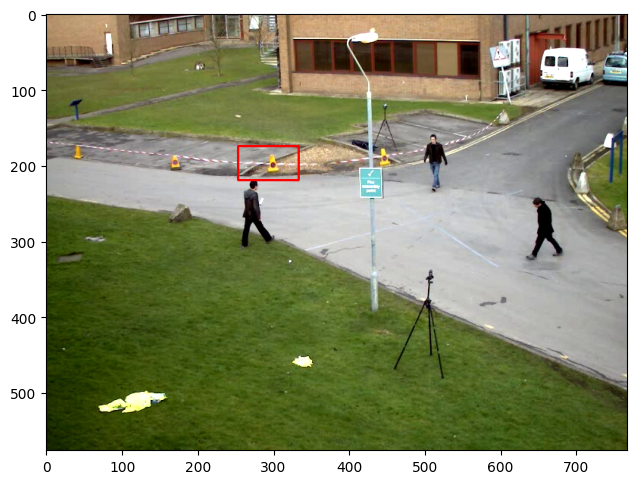

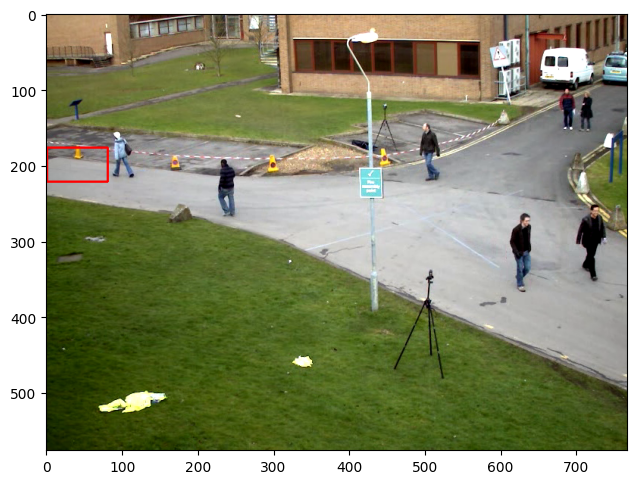

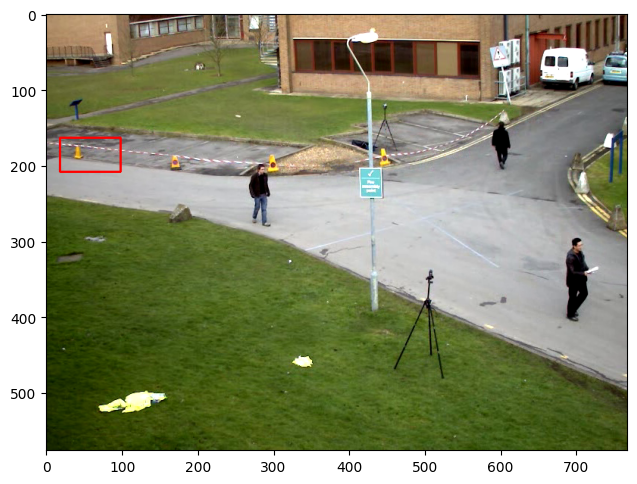

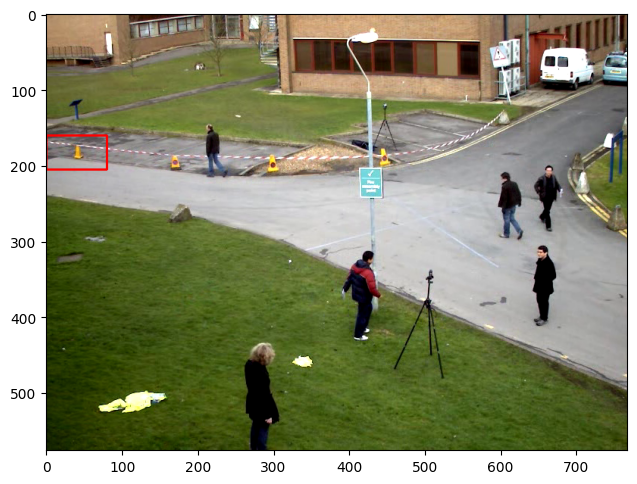

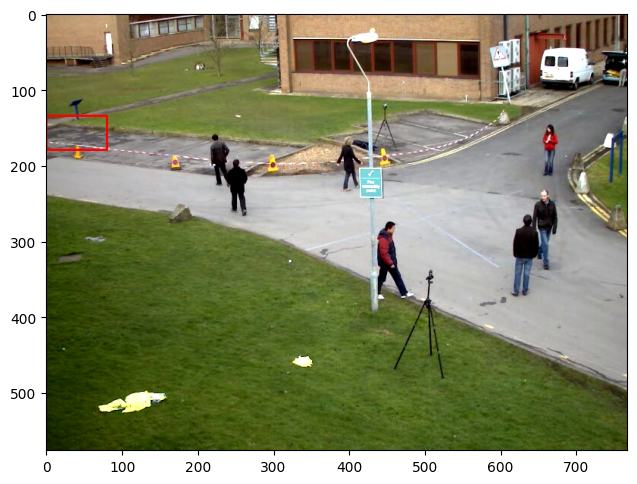

In [62]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

ret, frame = cap.read()

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_MEAN_SHIFT.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

x, y, w, h = 255, 220, 45, 80
track_window = (x, y, h, w)

cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
imshow(frame, axis=True)

roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0.0, 60.0, 32.0)), np.array((180.0, 255.0, 255.0)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

output_images = []

while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 100], 1)

        ret, track_window = cv2.meanShift(dst, track_window, term_crit)

        x, y, w, h = track_window
        img_out = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        out.write(img_out)
        output_images += [img_out]
    else:
        break

cap.release()
out.release()

step_size = len(output_images)//4
for cur_img in output_images[::step_size]:
    imshow(cur_img, axis=True)

---
### CAMSHIFT

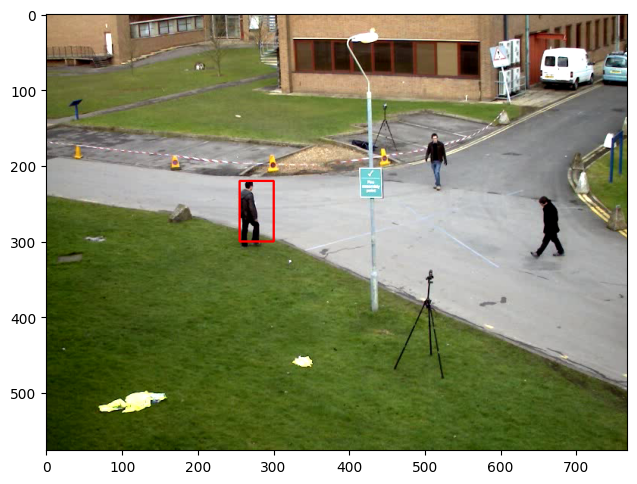

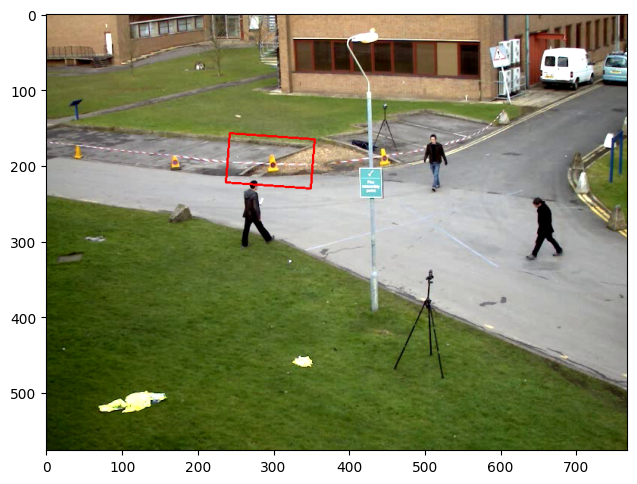

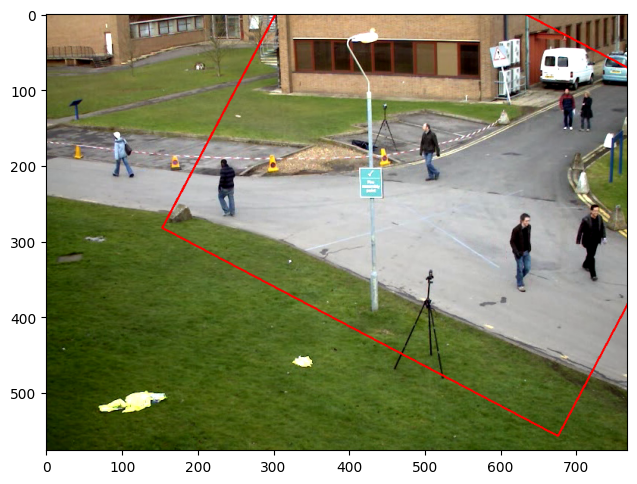

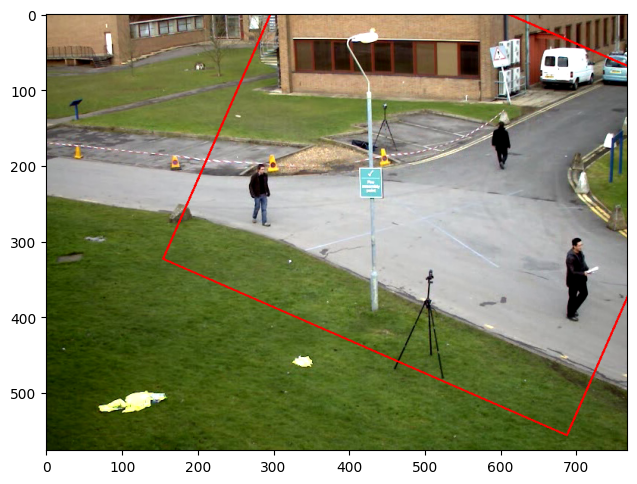

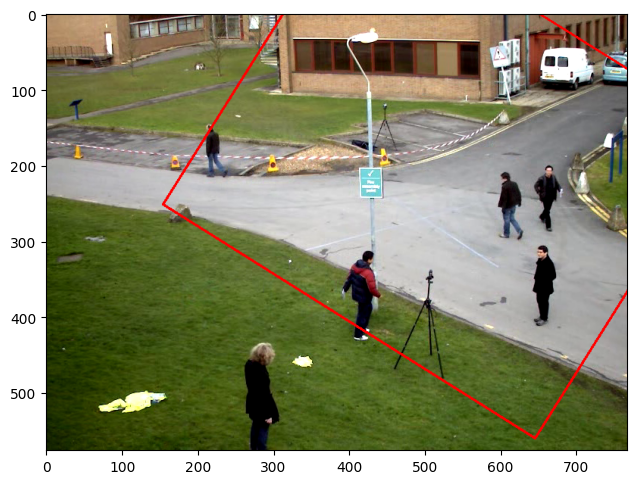

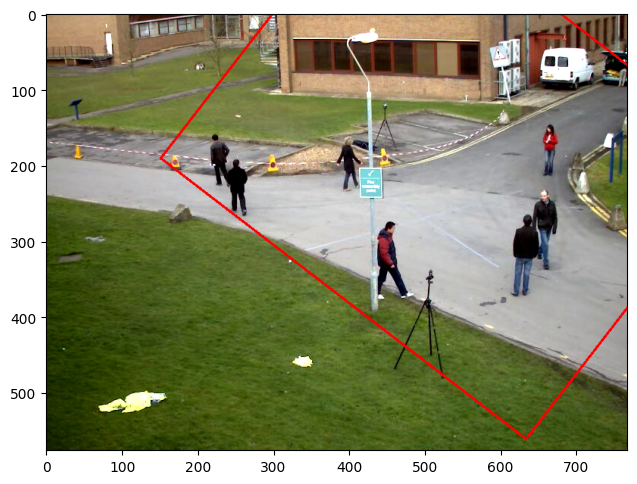

In [64]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

ret, frame = cap.read()

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_CAM_SHIFT.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

x, y, w, h = 255, 220, 45, 80
track_window = (x, y, h, w)

cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
imshow(frame, axis=True)

roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0.0, 60.0, 32.0)), np.array((180.0, 255.0, 255.0)))
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, 0, 255, cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

output_images = []

while True:
    ret, frame = cap.read()

    if ret:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 100], 1)

        ret, track_window = cv2.CamShift(dst, track_window, term_crit)

        pts = cv2.boxPoints(ret)
        pts = np.intp(pts)
        img_out = cv2.polylines(frame, [pts], True, (0, 0, 255), 2)
        out.write(img_out)
        output_images += [img_out]
    else:
        break

cap.release()
out.release()

step_size = len(output_images)//4
for cur_img in output_images[::step_size]:
    imshow(cur_img, axis=True)

---